In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from src.medidas_desempeno_biclase import calcula_medidas_biclase

In [2]:
ruta = 'data/df_limpio.csv'
df = pd.read_csv(ruta)
df.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Area,Status
0,0.070489,0.000000,0.214286,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,0.054830,0.036192,0.182857,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.035250,0.000000,0.094286,0.74359,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,0.030093,0.056592,0.171429,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,0.072356,0.000000,0.201429,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


### Eliminación de faltantes para depurarlo

In [3]:
df = df.dropna()

### Distribución de datos faltantes

Text(0.5, 1.0, 'Valores faltantes')

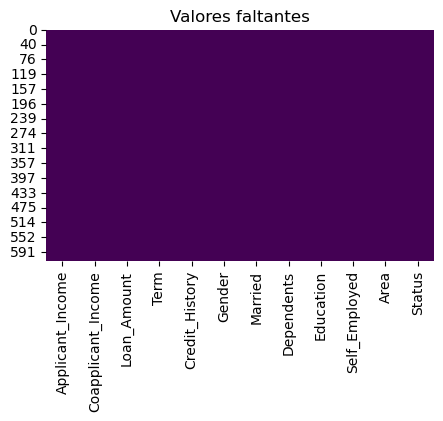

In [4]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
plt.title('Valores faltantes')

### Validación del dataset

In [6]:
X = df.drop('Status', axis = 1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    stratify = y, 
    random_state = 42
)

pipeline = Pipeline([
    ('svm', svm.SVC(
        C=3,
        gamma=0.003,
        kernel='linear'))
])

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv = skf,
    scoring = 'balanced_accuracy'
)

print(scores, scores.mean())

[0.79166667 0.70833333 0.73214286 0.63532764 0.76923077 0.65527066
 0.80769231 0.69230769 0.5968661  0.73148148] 0.7120319495319496


### Entrenamiento del modelo

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('svm', SVC(C=3, gamma=0.003, kernel='linear'))])

### Predicción

In [9]:
y_pred = pipeline.predict(X_test)

### Evaluación medidas Biclase

In [10]:
medidas_df = calcula_medidas_biclase(y_test, y_pred)
medidas_df

,Medida,Valor
0,Accuracy,0.780000
1,Error Rate,0.220000
2,Recall (Sensitivity),0.985294
3,Specificity,0.343750
4,Balanced Accuracy,0.664522
5,Precision,0.761364
6,F1 Score,0.858974
7,MCC,0.472337
